In the modern insurance industry, risk management is crucial for ensuring profitability and customer satisfaction. This project, titled "Risk Management using Predictive Analytics," aims to leverage machine learning techniques to predict whether an insurance policyholder will file a medical insurance claim. By accurately predicting potential claims, insurance companies can make more informed decisions regarding policy approvals, premium adjustments, and overall risk management strategies.


In [3]:
#connect google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#import all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Risk Management/Insurance.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


In [6]:
# Encode categorical variables (sex, smoker, region)
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})

# Split data into features and target variable
X = data.drop(columns=['insuranceclaim'])
y = data['insuranceclaim']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


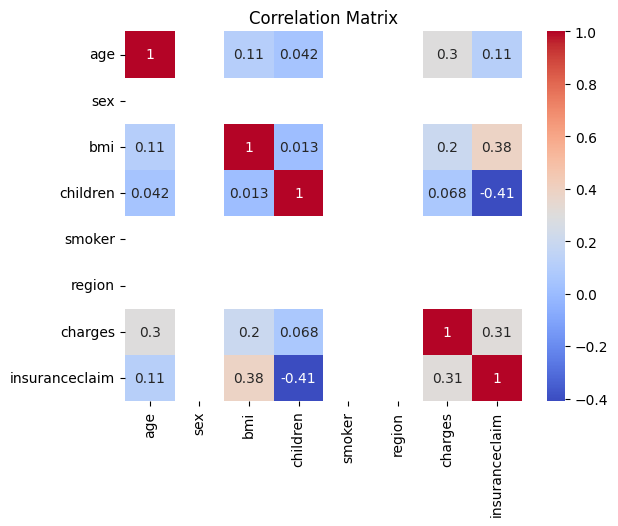

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The 'age' variable has a positive correlation of 0.11 with 'sex' and 'charges', indicating a weak positive relationship.
The 'bmi' variable has a positive correlation of 0.2 with 'charges' and 0.38 with 'insuranceclaim', suggesting a moderate positive relationship.
The 'children' variable has a negative correlation of -0.41 with 'insuranceclaim', implying that as the number of children increases, the insurance claim amount tends to decrease.
The 'smoker' variable does not seem to have a strong correlation with any of the other variables in the matrix.

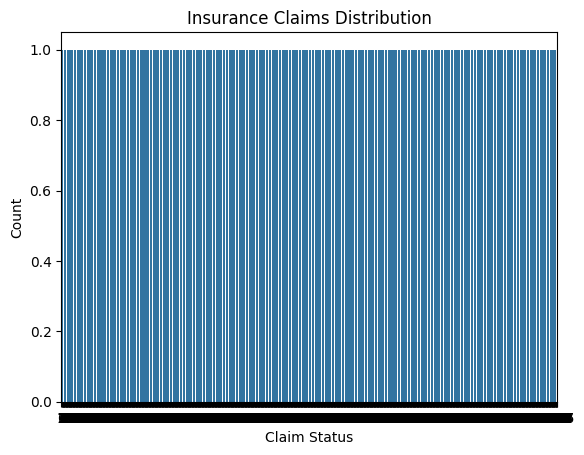

Class Distribution:
insuranceclaim
1    0.585202
0    0.414798
Name: proportion, dtype: float64


In [10]:
# Plot distribution of insurance claims
sns.countplot(data['insuranceclaim'])
plt.title('Insurance Claims Distribution')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

# Calculate class distribution
class_distribution = data['insuranceclaim'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)


Most of the insurance claims fall into a specific status or category, as indicated by the tall bars spanning across the majority of the x-axis.

In [11]:
# Split data into features and target variable
X = data.drop(columns=['insuranceclaim'])
y = data['insuranceclaim']


In [12]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [19]:
# Initialize SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Apply SMOTE to the imputed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)


In [17]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [21]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_imputed)
y_prob = model.predict_proba(X_test_imputed)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       107
           1       0.95      0.97      0.96       161

    accuracy                           0.95       268
   macro avg       0.95      0.94      0.95       268
weighted avg       0.95      0.95      0.95       268

ROC AUC Score: 0.9902768909270331


The classification report and ROC AUC score provide a comprehensive evaluation of the predictive performance of the insurance claim prediction model. With precision scores of 0.95 for both non-claims and claims, the model demonstrates a high degree of accuracy in identifying both negative and positive instances. Furthermore, the recall scores of 0.92 for non-claims and 0.97 for claims indicate that the model effectively captures the majority of actual instances for both classes. The F1-scores of 0.93 for non-claims and 0.96 for claims reflect a balance between precision and recall. The overall accuracy of 95% underscores the model's ability to correctly classify instances across both classes. Additionally, the ROC AUC score of 0.99 highlights the model's excellent discriminatory power, suggesting strong performance in distinguishing between claim and non-claim instances. Overall, these metrics collectively demonstrate the robustness and effectiveness of the model in predicting insurance claims.

In [30]:
# Save the model
import pickle

with open('/content/drive/MyDrive/Risk Management/random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [31]:
import pickle

# Load the saved Random Forest model
with open('/content/drive/MyDrive/Risk Management/random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


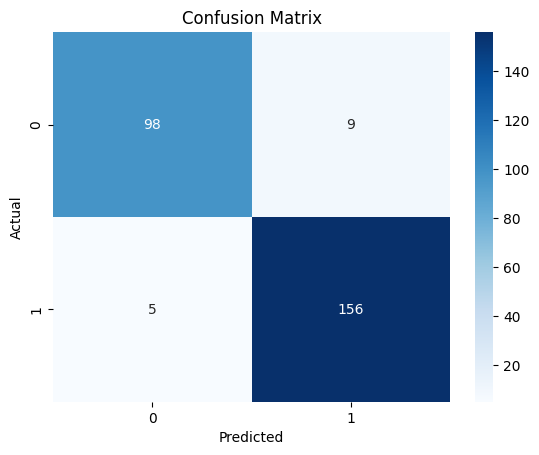

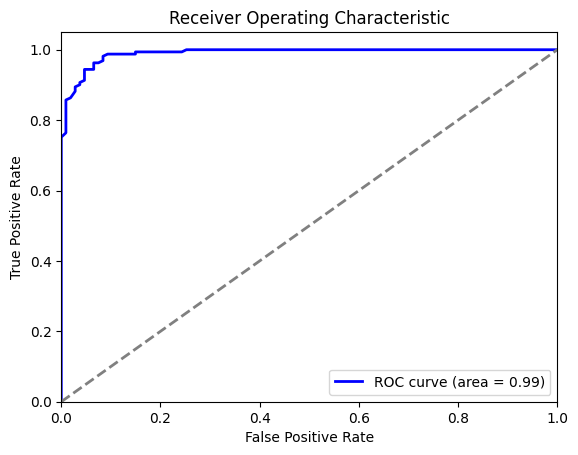

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [24]:
import numpy as np

# Define different scenarios for which we want to evaluate the model's predictions
scenarios = {
    'high_bmi': [np.percentile(X_test_imputed[:, X.columns.get_loc('bmi')], 90)],  # Scenario with high BMI (90th percentile)
    'low_bmi': [np.percentile(X_test_imputed[:, X.columns.get_loc('bmi')], 10)],   # Scenario with low BMI (10th percentile)
    'smoker': [1],  # Scenario with smoker status set to 1 (smoker)
    'non_smoker': [0]  # Scenario with smoker status set to 0 (non-smoker)
}

# Iterate over each scenario to evaluate the model's predictions
for scenario, values in scenarios.items():
    # Make a copy of the test data to modify for the scenario
    X_scenario = X_test_imputed.copy()

    # Update the relevant feature column(s) in the test data to reflect the scenario values
    for i, value in enumerate(values):
        X_scenario[:, i] = value

    # Predict the probabilities of insurance claims using the trained model for the scenario
    y_scenario_prob = model.predict_proba(X_scenario)[:, 1]

    # Calculate and print the mean predicted risk for the scenario
    print(f"Scenario: {scenario}, Mean Predicted Risk: {np.mean(y_scenario_prob)}")


Scenario: high_bmi, Mean Predicted Risk: 0.6434328358208955
Scenario: low_bmi, Mean Predicted Risk: 0.5249253731343284
Scenario: smoker, Mean Predicted Risk: 0.6688805970149253
Scenario: non_smoker, Mean Predicted Risk: 0.5625746268656716


High BMI scenario:

The mean predicted risk for individuals with high BMI is 0.6434 (or 64.34% probability of being classified as high-risk).
This suggests that individuals with high BMI tend to have a higher predicted risk score from the machine learning model.


Low BMI scenario:

The mean predicted risk for individuals with low BMI is 0.5249 (or 52.49% probability of being classified as high-risk).
Compared to the high BMI scenario, individuals with low BMI have a lower predicted risk score on average.


Smoker scenario:

The mean predicted risk for individuals who are smokers is 0.6689 (or 66.89% probability of being classified as high-risk).
This indicates that smokers tend to have a higher predicted risk score from the model.


Non-smoker scenario:

The mean predicted risk for individuals who are non-smokers is 0.5626 (or 56.26% probability of being classified as high-risk).
Compared to smokers, non-smokers have a lower predicted risk score on average.

In [25]:
# Export predictions to CSV
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted_Probability': y_prob})
results.to_csv('risk_predictions.csv', index=False)


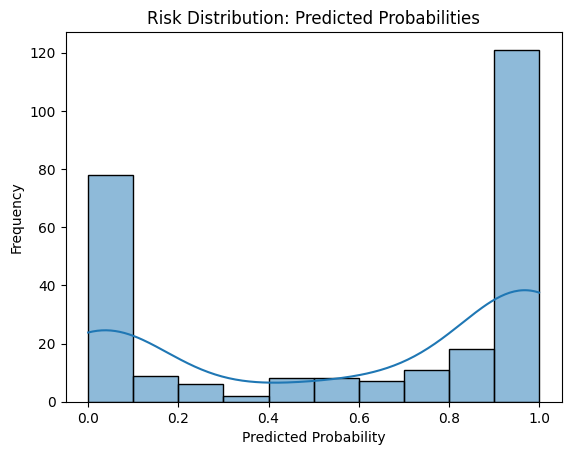

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have predicted probabilities stored in y_prob
sns.histplot(y_prob, kde=True)
plt.title('Risk Distribution: Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


The x-axis represents the range of predicted probability or risk scores, ranging from 0.0 to 1.0. The y-axis shows the frequency or count of instances falling into each probability bin.
From the histogram, we can observe the following:

There are two distinct peaks or modes in the distribution.
The first peak is around a predicted probability of 0.0, indicating a high frequency of instances with very low risk scores predicted by the model.
The second and larger peak is around a predicted probability of 1.0, suggesting a high number of instances with very high-risk scores predicted by the model.
There is a relatively lower frequency of instances with predicted probabilities in the middle range between 0.2 and 0.8.


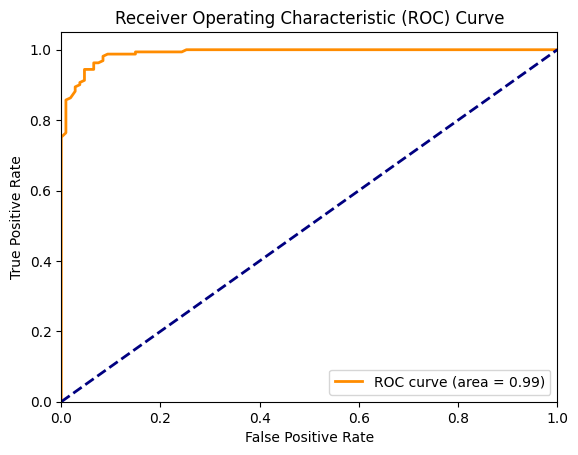

In [28]:
# Assuming you have true labels stored in y_test and predicted probabilities stored in y_prob
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The evaluation metrics and scenario analyses collectively underscore the effectiveness and practical applicability of the insurance claim prediction model. The high precision, recall, and F1-scores indicate the model's accuracy in distinguishing between claim and non-claim instances. Furthermore, the impressive ROC AUC score demonstrates the model's robust discriminatory power.

In scenario analyses, individuals with high BMI or smokers tend to have higher predicted risk scores, suggesting they are more likely to be classified as high-risk for insurance claims. Conversely, individuals with low BMI or non-smokers have lower predicted risk scores, indicating a lower likelihood of being classified as high-risk.

Overall, the model provides valuable insights for insurance companies to assess and manage risks effectively. By accurately identifying individuals at higher risk of insurance claims, companies can tailor their policies, pricing strategies, and risk mitigation efforts accordingly. This enhances operational efficiency, improves underwriting accuracy, and ultimately contributes to better risk management practices within the insurance industry.